In [43]:
import pandas as pd
df = pd.read_csv('breast_cancer.csv')

In [45]:
# Step 3: Clean column names
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces

In [47]:
# Step 4: Drop irrelevant columns (adjust as needed)
cols_to_drop = ['Marital Status', 'Race', 'differentiate', 'A Stage']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [49]:
# Step 5: Create 'Priority' label (High/Medium/Low) based on Tumor Size
# You can adjust thresholds as per clinical context
def assign_priority(size):
    if size >= 50:
        return 'High'
    elif size >= 20:
        return 'Medium'
    else:
        return 'Low'

df['Priority'] = df['Tumor Size'].apply(assign_priority)

In [51]:
# Step 6: Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns.drop('Priority')

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [53]:
# Step 7: Train-test split
X = df.drop(columns=['Priority'])
y = df['Priority']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Step 8: Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
# Step 9: Predictions
y_pred = model.predict(X_test)

In [59]:
# Step 10: Evaluation
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [61]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00       135
         Low       1.00      1.00      1.00       289
      Medium       1.00      1.00      1.00       381

    accuracy                           1.00       805
   macro avg       1.00      1.00      1.00       805
weighted avg       1.00      1.00      1.00       805



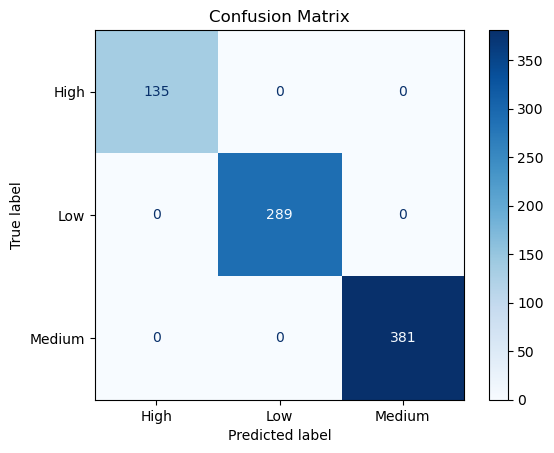

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=priority_encoder.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [65]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("🔎 Accuracy:", acc)
print("🎯 F1 Score (weighted):", f1)
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=priority_encoder.classes_))

🔎 Accuracy: 1.0
🎯 F1 Score (weighted): 1.0

📋 Classification Report:

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       135
         Low       1.00      1.00      1.00       289
      Medium       1.00      1.00      1.00       381

    accuracy                           1.00       805
   macro avg       1.00      1.00      1.00       805
weighted avg       1.00      1.00      1.00       805

